In [ ]:
'''
Graph and Loss visualization using Tensorboard.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

In [ ]:
from __future__ import print_function

import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [6]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1
logs_path = '/tmp/tensorflow_logs/example'

# tf Graph Input
# mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition => 10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

In [9]:
# Construct model and encapsulating all ops into scopes, making
# Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

In [11]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))

    print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

Epoch: 0001 cost= 1.182138961
Epoch: 0002 cost= 0.664609327
Epoch: 0003 cost= 0.552565036
Epoch: 0004 cost= 0.498541865
Epoch: 0005 cost= 0.465393374
Epoch: 0006 cost= 0.442491178
Epoch: 0007 cost= 0.425474149
Epoch: 0008 cost= 0.412152022
Epoch: 0009 cost= 0.401320939
Epoch: 0010 cost= 0.392305281
Epoch: 0011 cost= 0.384732356
Epoch: 0012 cost= 0.378109478
Epoch: 0013 cost= 0.372409370
Epoch: 0014 cost= 0.367236996
Epoch: 0015 cost= 0.362727492
Epoch: 0016 cost= 0.358627345
Epoch: 0017 cost= 0.354815522
Epoch: 0018 cost= 0.351413656
Epoch: 0019 cost= 0.348314827
Epoch: 0020 cost= 0.345429416
Epoch: 0021 cost= 0.342749324
Epoch: 0022 cost= 0.340224642
Epoch: 0023 cost= 0.337897302
Epoch: 0024 cost= 0.335720168
Epoch: 0025 cost= 0.333691911
Optimization Finished!
Accuracy: 0.9143
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


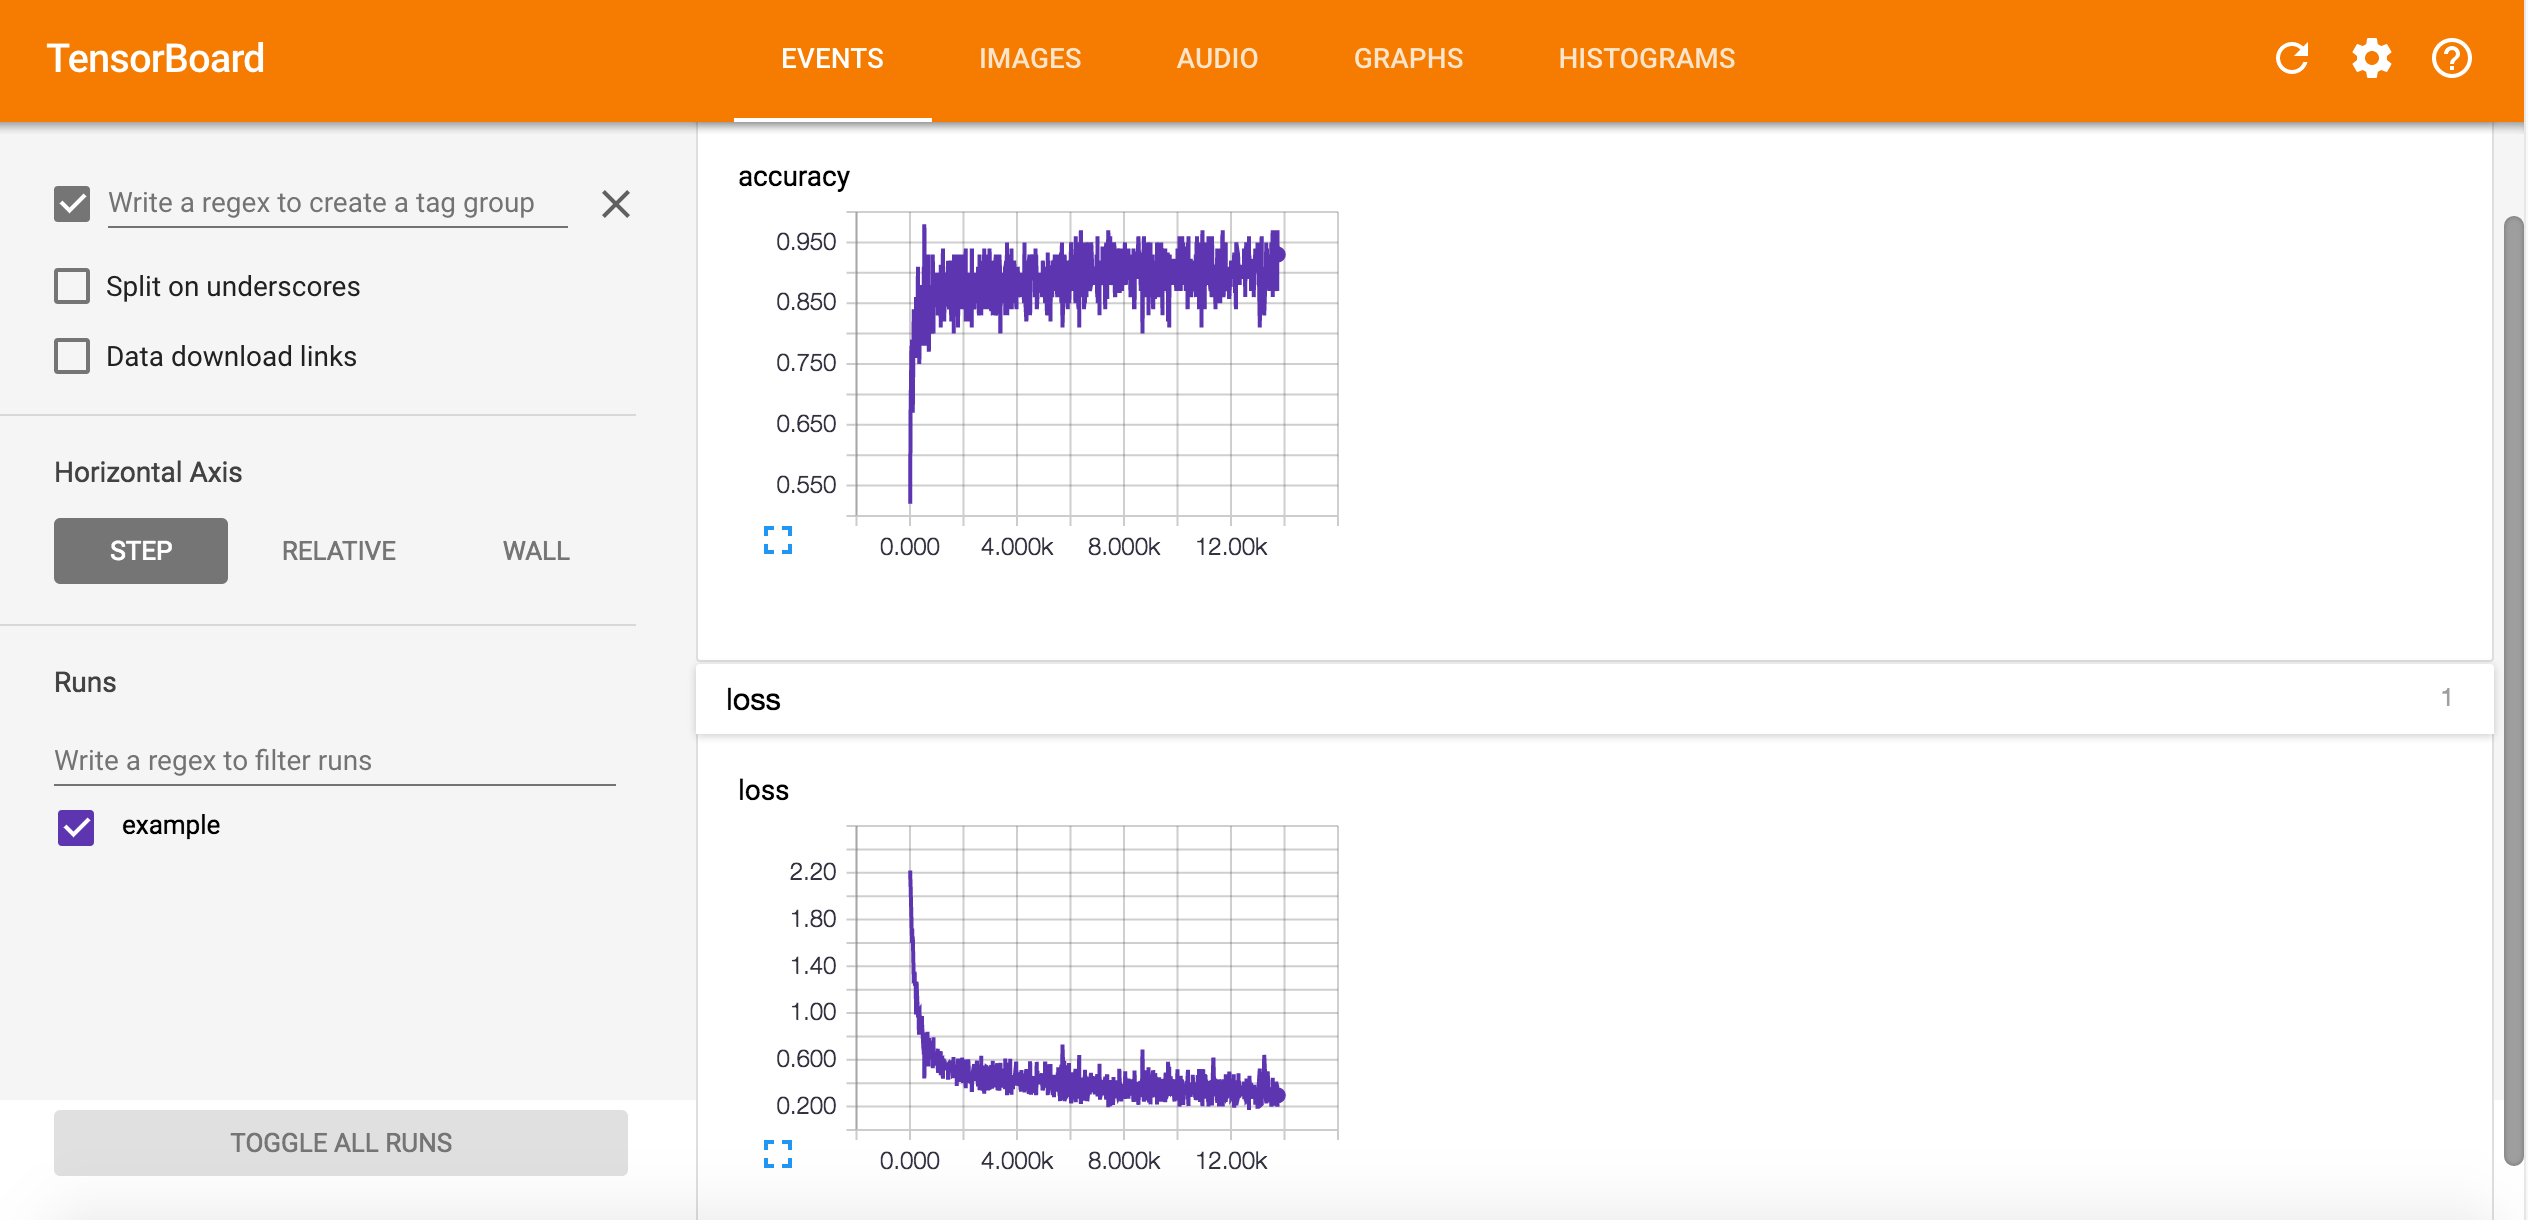

In [2]:
# Loss and accuracy Visualization

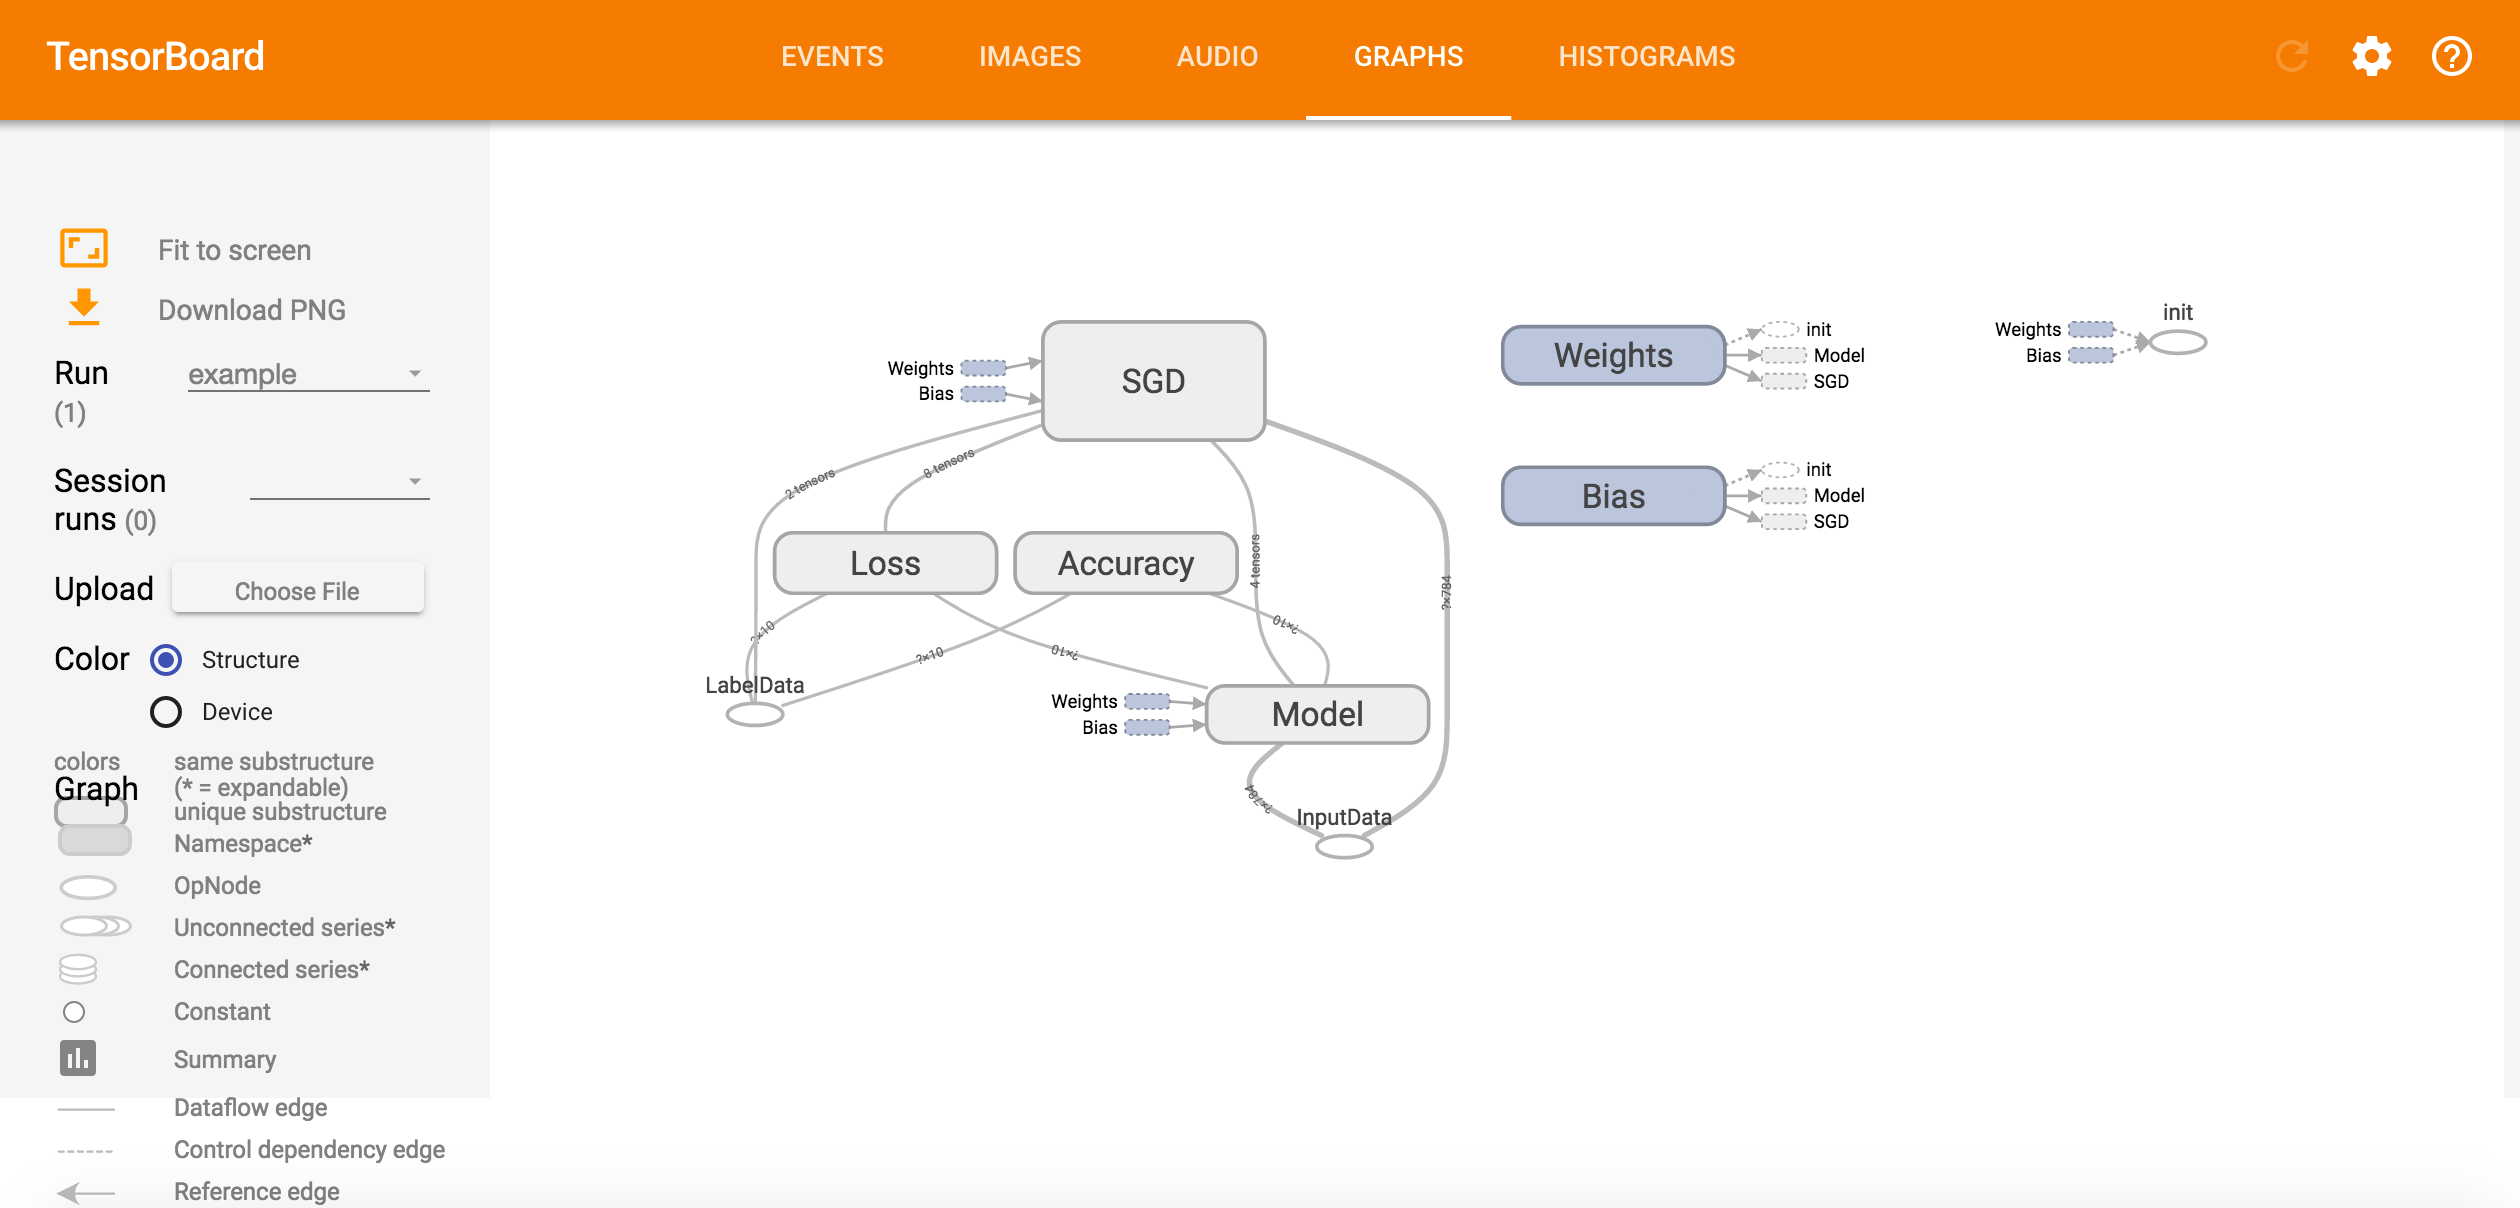

In [3]:
# Graph Visualization